<a href="https://colab.research.google.com/github/Jake0925/DeepLearning/blob/master/Seabron_StatisticalEstimation_countplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


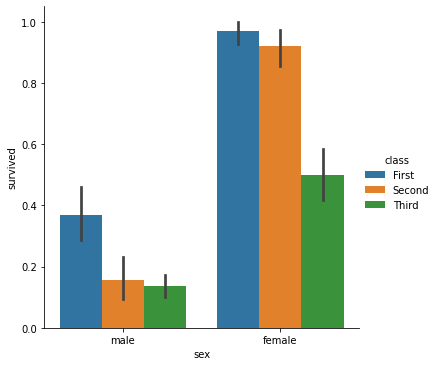

In [36]:
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic) # 속성인 estimator의 초기값은 평균으로 설정되어있다
                                                                          # 연산을 내부적으로 진행하여 그래프를 그리므로 편리하다

위의 catplot를 사용하지 않는경우 아래와같이 연산 과정을 거쳐야한다

In [37]:
group = titanic.groupby(['sex', 'class'])['survived'].mean()  # 성별마다 생존율,  앞의([   ])는 범주, 뒤의 []는 수치값
group_data = group.unstack()

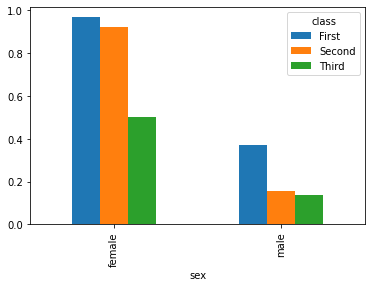

In [38]:
group_data.plot.bar()

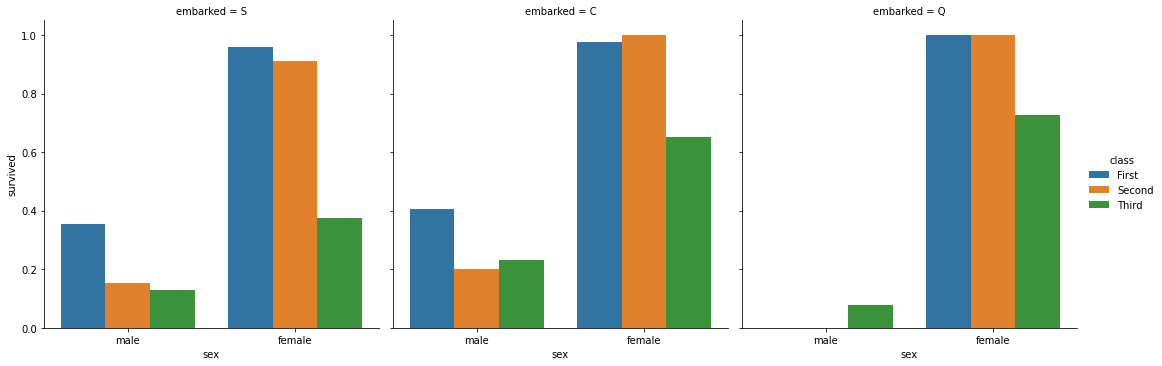

In [39]:
 sns.catplot(data=titanic, x="sex", y="survived", hue="class", kind="bar", 
             col= 'embarked', ci=None) # 샘플링할 데이터가 별로 없을떈 막대그래프안 상부의 라인이 그려지지않는다
                                       # ci=None로하면 상부의 라인을 그리지 않는다, 연산속도가 오래걸리므로 가급적 none으로 설정

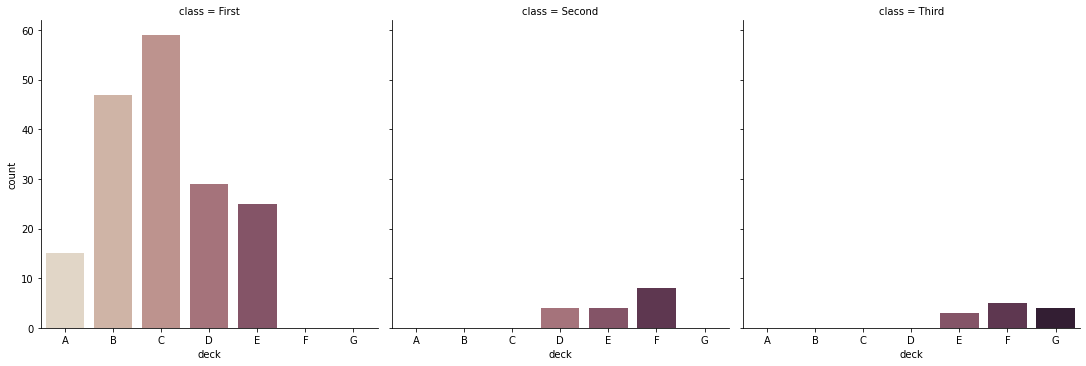

In [40]:
sns.catplot(data=titanic, x="deck", kind="count", palette="ch:.25", col='class') # kind="count" 빈도수

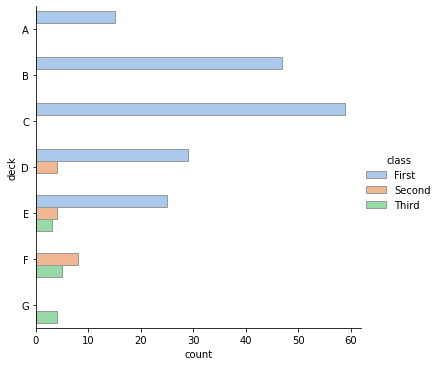

In [41]:
sns.catplot(data=titanic, y="deck", hue = 'class', kind="count", 
            palette="pastel", edgecolor='.6')

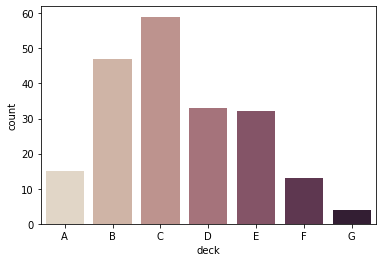

In [42]:
sns.countplot(data=titanic, x='deck', palette="ch:.25")

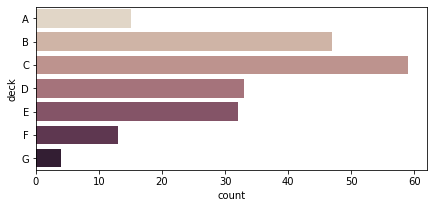

In [43]:
plt.figure(figsize=(7,3)) # countplot는 subplot과 figure등을 적용할수있다
sns.countplot(data=titanic, y='deck', palette="ch:.25") # 위의 x='deck'을 y='deck'로 변경

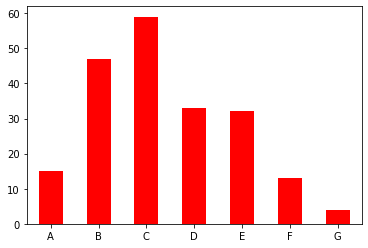

In [44]:
#pandas에서 countplot을 그리고 싶은경우 직접 연산식을 만들어야한다
# titanic['deck'].value_counts().plot() # 라인으로만 그래프를 그린다
# titanic['deck'].value_counts().plot.bar() # 바타입으로 그래프를 그린다
# titanic['deck'].value_counts().sort_index().plot.bar() # X축을 인덱스별로 정렬한다
titanic['deck'].value_counts().sort_index().plot.bar(rot=0,  color = 'r') # 색상변경 cmap='Reds'도 사용가능

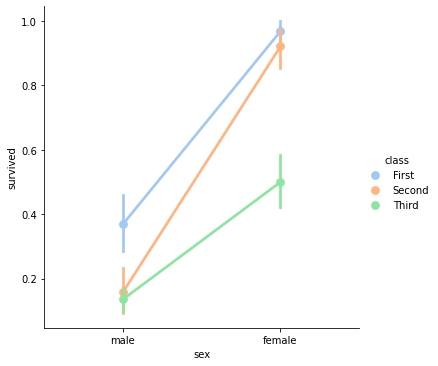

In [45]:
sns.catplot(data=titanic, x='sex', y="survived", hue = 'class', kind="point", 
            palette="pastel") # estimator의 초기값은 평균이다

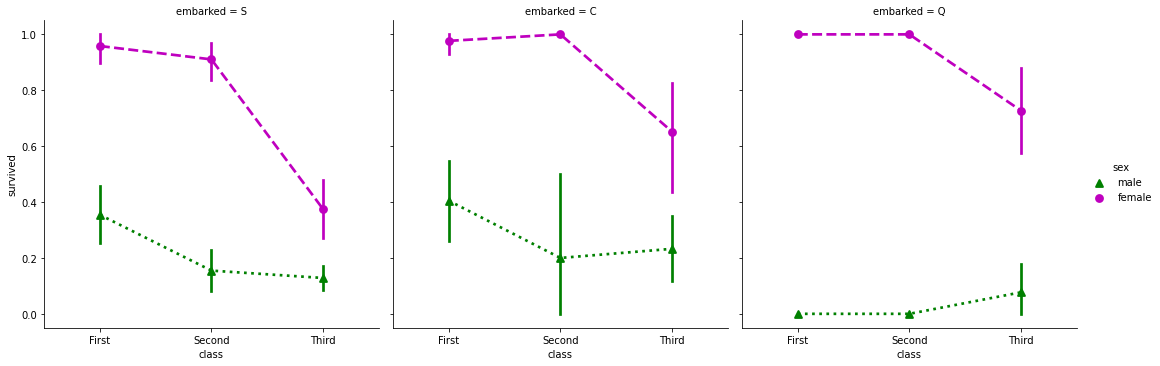

In [46]:
sns.catplot(data=titanic, x="class", y="survived", hue="sex",
            palette={"male": "g", "female": "m"}, # 남성일때와 여성일때 다른색상으로 표시
            markers=["^", "o"], linestyles=[":", "--"], # point부분 표시 방법설정과 Line부분 표시 방법설정
            kind="point", col='embarked')

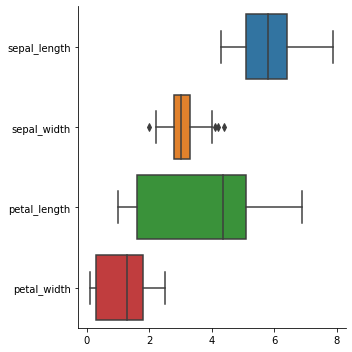

In [47]:
iris = sns.load_dataset("iris")
sns.catplot(data=iris, orient="h", kind="box") # 모든 column에 대한 데이터를 볼수있다

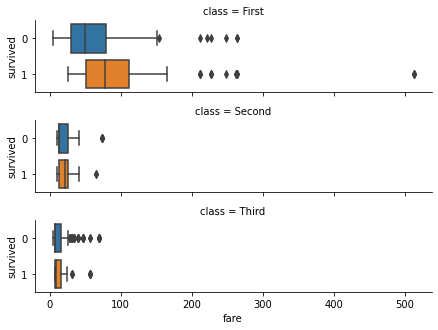

In [49]:
g = sns.catplot(x="fare", y="survived", row="class",
                kind="box", orient="h", height=1.5, aspect=4,
                data=titanic.query("fare > 0"))

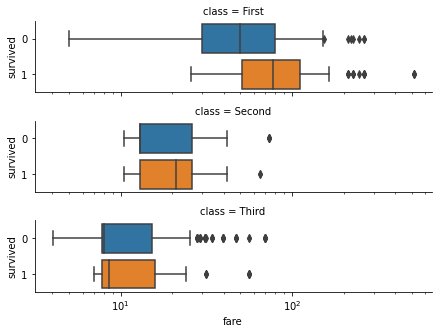

In [51]:
g = sns.catplot(x="fare", y="survived", row="class",
                kind="box", orient="h", height=1.5, aspect=4,
                data=titanic.query("fare > 0"))

g.set(xscale="log") # 위의 경우와같이 class가 second와 third의경우 폭이좁아 값을 알기어려운데 log를 통해 x축 값의 표시단위를 변경하여 그래프를 크게 볼수있다